In [1]:
%matplotlib inline

In [2]:
# import basic packages
import numpy as np
import pandas as pd

In [3]:
import os
asset_base = "../asset/ml-latest-small/"
# Check directories
# os.listdir(asset_base)

In [4]:
movies = pd.read_csv(asset_base + "movies.csv")
ratings = pd.read_csv(asset_base + "ratings.csv")
links = pd.read_csv(asset_base + "links.csv")
tags = pd.read_csv(asset_base + "tags.csv")

In [5]:
# remove timestamp column
df = ratings[ratings.columns[:-1]]

In [6]:
df_table = df.set_index(["userId", "movieId"]).unstack()

[Surprise package](http://surpriselib.com/)

In [10]:
# Baseline model
from surprise import BaselineOnly

# Collaborative filtering models
# Neighborhood models
from surprise import KNNBasic, KNNWithMeans, KNNBaseline

# Latent factor models
from surprise import SVD, SVDpp, NMF

In [12]:
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse
from surprise import accuracy

In [16]:
from surprise import Dataset

In [42]:
algo_types = {
    "baseline_algos" : [BaselineOnly],
    "neighborhood_algos" : [KNNBasic, KNNWithMeans, KNNBaseline],
    "latent_factor_algos" : [SVD, NMF] # SVDpp takes too long
}

In [17]:
data = Dataset.load_builtin('ml-100k')

In [22]:
trainset, testset = train_test_split(data, test_size=.15)

In [ ]:
BaselineOnly()

In [62]:
def run_algorithms(model_results, sim_options):
    for idx, algos in enumerate(algo_types.keys()):
        print(algos, idx)
        for algo in algo_types[algos]:
            algo_ = algo(sim_options=sim_options) if algos is "neighborhood_algos" else algo()
            results = cross_validate(algo_, data, measures=['RMSE'], cv=3, verbose=False)
            tmp = pd.DataFrame.from_dict(results).mean(axis=0)
            tmp['type'] = algos
            tmp['sim'] = sim_options['name']
            tmp['user_based'] = sim_options['user_based']
            tmp = tmp.append(pd.Series([str(algo()).split(' ')[0].split('.')[-1]], index=['Algo']))
            model_results.append(tmp)

In [64]:
model_results = []
sim_options = []
is_user_based = [True, False]
names = ['msd', 'cosine', 'pearson', 'pearson_baseline']
for name in names:
    for bool_ in is_user_based:  
        sim_options.append({
            'name' : name,
            'user_based' : bool_
        })

In [65]:
for idx, sim_option in enumerate(sim_options):
    print("---------------------------------")
    print(idx + 1, "/", len(sim_options))
    print("---------------------------------")
    run_algorithms(model_results, sim_option)

---------------------------------
0
---------------------------------
baseline_algos 0
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
neighborhood_algos 1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
latent_factor_algos 2
---------------------------

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
latent_factor_algos 2


In [66]:
results = pd.DataFrame(model_results).set_index('Algo').sort_values('test_rmse')

In [222]:
results

,test_rmse,fit_time,test_time,type,sim,user_based
Algo,,,,,,
KNNBaseline,0.928148,1.074576,5.303345,neighborhood_algos,pearson_baseline,False
KNNWithMeans,0.932354,1.092308,4.515414,neighborhood_algos,pearson_baseline,False
KNNBaseline,0.932755,0.763718,4.573584,neighborhood_algos,pearson_baseline,True
KNNBaseline,0.936674,0.366075,5.112711,neighborhood_algos,msd,True
KNNBaseline,0.939301,0.448136,5.386962,neighborhood_algos,msd,False
KNNBaseline,0.939674,0.781104,4.807055,neighborhood_algos,cosine,True
KNNWithMeans,0.940683,0.374856,4.723429,neighborhood_algos,msd,False
KNNBaseline,0.940713,1.096498,5.519165,neighborhood_algos,pearson,True
SVD,0.945004,3.060768,0.243283,latent_factor_algos,cosine,True


In [69]:
user_based = results[results.user_based == True]
item_based = results[results.user_based == False]

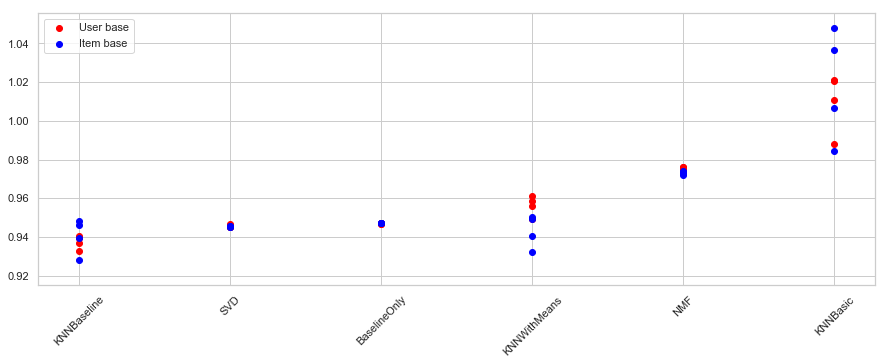

In [221]:
plt.figure(figsize=(15, 5))
plt.scatter(user_based.index, user_based['test_rmse'], c='red')
plt.scatter(item_based.index, item_based['test_rmse'], c='blue')
plt.xticks(rotation=45)
plt.legend(["User base", "Item base"])
plt.show()

In [124]:
def get_sparsity(df):
    n, s = df.shape
    total_null_values = df.isna().sum().sum()
    return total_null_values/(n*s)

In [125]:
get_sparsity(df_table)

0.9830003169443864

In [102]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])

In [126]:
links.tail()

,movieId,imdbId,tmdbId
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
9741,193609,101726,37891.0


In [113]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [114]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [177]:
import requests
from bs4 import BeautifulSoup

In [198]:
def get_img_url(imdbid):
    base_url = "https://www.imdb.com/title/tt"
    res = requests.get(base_url + str(imdbid))
    dom = BeautifulSoup(res.content, 'html.parser')
    img = dom.select('#title-overview-widget > div.vital > div.slate_wrapper > div.poster > a > img')
    src = ""
    if len(img) > 0:
        src = img[0].attrs['src']
    return src

In [220]:
get_img_url(links.sample(1)["imdbId"].iloc[0])

'https://m.media-amazon.com/images/M/MV5BMTQ0MjQ3MTY3OF5BMl5BanBnXkFtZTgwMjg2MjQ5NTE@._V1_UX182_CR0,0,182,268_AL_.jpg'